In [6]:
import numpy as np
import pickle
import matplotlib.pylab as plt
from sklearn.metrics import auc
%matplotlib inline


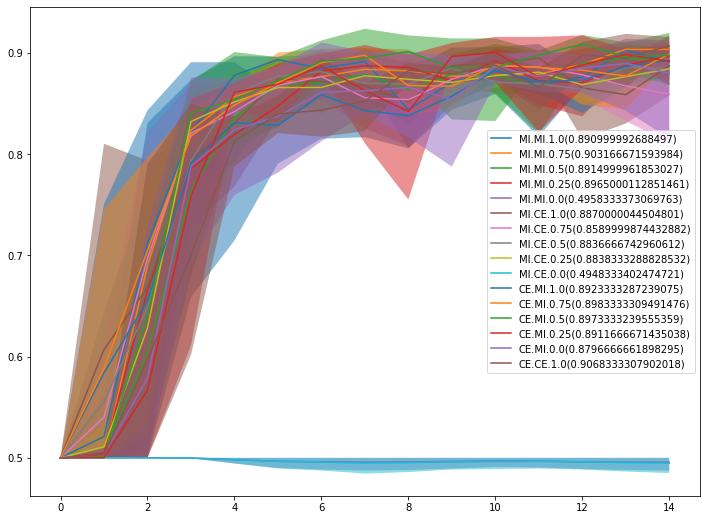

In [2]:
plt.rcParams['figure.figsize'] = (12, 9)
for parameter_opt_type in ['MI', 'CE']:
    for gamma_opt_type in ['MI', 'CE']:
        for lam in [0.0, 0.25, 0.5, 0.75, 1.0][::-1]:
            
            if gamma_opt_type == 'CE' and parameter_opt_type == 'CE' and lam != 1.0:
                continue
            results = []
            for seed in [0, 13, 42]:
                name = f'{parameter_opt_type}.{gamma_opt_type}.{lam}.{seed}'
                with open(name+'.pckl', 'rb') as inp:
                    history,_ =  pickle.loads(inp.read())
                    results.append(history)
            plt.fill_between(range(len(history)), np.min(results, 0), np.max(results, 0), alpha=0.5)
            plt.plot(range(len(history)), np.mean(results, 0), label=name.rsplit('.', 1)[0]+f'({np.mean(results, 0)[-1]})')
plt.legend(loc='best')

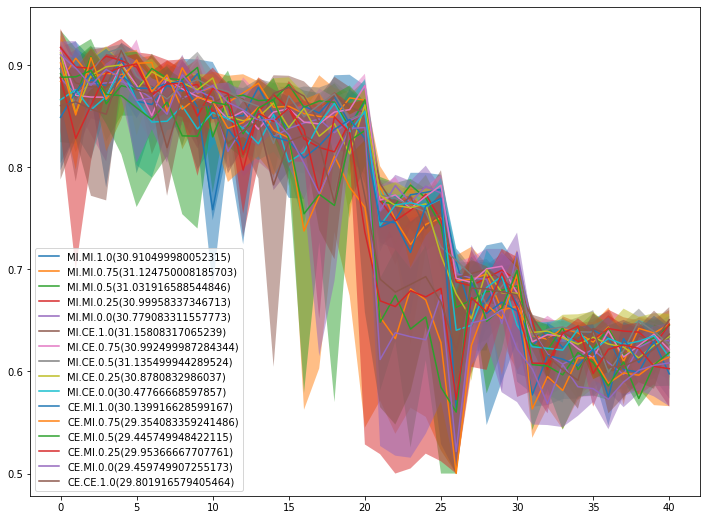

In [11]:
plt.rcParams['figure.figsize'] = (12, 9)
for parameter_opt_type in ['MI', 'CE']:
    for gamma_opt_type in ['MI', 'CE']:
        for lam in [0.0, 0.25, 0.5, 0.75, 1.0][::-1]:
            if gamma_opt_type == 'CE' and parameter_opt_type == 'CE' and lam != 1.0:
                continue
            results = []
            for seed in [0, 13, 42]:
                name = f'{parameter_opt_type}.{gamma_opt_type}.{lam}.{seed}'
                with open(name+'tuned.pckl', 'rb') as inp:
                    history,_ =  pickle.loads(inp.read())
                    results.append(history)
            plt.fill_between(range(len(history)), np.min(results, 0), np.max(results, 0), alpha=0.5)
            
            auc_ = auc(range(len(history)), np.mean(results, 0))
            plt.plot(range(len(history)), np.mean(results, 0), label=name.rsplit('.', 1)[0]+f'({auc_})')
plt.legend(loc='best')